In [1]:
import pandas as pd

import spacy
from spacy_cld import LanguageDetector

from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
data_path = "../data/AERA02_AptitudeAssessment_Dataset_NLP.csv"

df = pd.read_csv(data_path)

In [3]:
df

score                                              title  \
0         5.0                                   Very good hotel    
1         4.0  BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...   
2         5.0                            Great place in Cau Giay   
3         5.0                                    TRẢI NGHIỆM TỐT   
4         5.0                                       Perfect stay   
...       ...                                                ...   
1203207   5.0                                          乾淨整潔，交通方便   
1203208   5.0                                   Check this place   
1203209   5.0                             店员给了我们很多帮助，装修简单精致，卫生很好   
1203210   5.0                                           Công tác   
1203211   3.0       Neu, hübsch eingerichtet, aber einige Mängel   

                                                    review  
0        Good hotel i have ever stayed in Vietnam, good...  
1        Este hotel está muy cerca del barrio de las em...  
2        This place was very nice. Our bedroom were cle...  
3        Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...  
4        It was a amazing hotel. They helped very good ...  
...                                                    ...  
1203207  位於峴港市區，距離韓江橋或韓市場都不會太遠，店員很熱心，還可以幫忙預訂摩托車跟行程，非常值得...  
1203208  My friend and I received excellent and profess...  
1203209  这是我们此行到越南第一个入住的酒店，也是呆的时间最长的酒店。酒店原本是一家咖啡店，其次楼上有...  
1203210  Rất tuyệt vời... khi đến đây tôi cảm giác thoả...  
1203211  Das Hostel ist ganz neu und sehr nett eingeric...  

[1203212 rows x 3 columns]

In [4]:
df.isna().sum()

score     163856
title     163871
review    389364
dtype: int64

In [5]:
df[df.isna().any(axis=1)].T

3000     \
score                                  5.0   
title   Friendly and helpful team of staff   
review                                 NaN   

                                   3001     \
score                                  5.0   
title   Friendly and helpful team of staff   
review                                 NaN   

                                   3002     \
score                                  5.0   
title   Friendly and helpful team of staff   
review                                 NaN   

                                   3003     \
score                                  5.0   
title   Friendly and helpful team of staff   
review                                 NaN   

                                   3004     \
score                                  5.0   
title   Friendly and helpful team of staff   
review                                 NaN   

                                   3005     \
score                                  5.0   
title   Friendly and helpful team of staff   
review                                 NaN   

                                   3006     \
score                                  5.0   
title   Friendly and helpful team of staff   
review                                 NaN   

                                   3007     \
score                                  5.0   
title   Friendly and helpful team of staff   
review                                 NaN   

                                   3008     \
score                                  5.0   
title   Friendly and helpful team of staff   
review                                 NaN   

                                   3009     ...  \
score                                  5.0  ...   
title   Friendly and helpful team of staff  ...   
review                                 NaN  ...   

                                      1179643  \
score                                     5.0   
title   Very Clean Room With Reasonable Price   
review                                    NaN   

                                      1179644  \
score                                     5.0   
title   Very Clean Room With Reasonable Price   
review                                    NaN   

                                      1179645  \
score                                     5.0   
title   Very Clean Room With Reasonable Price   
review                                    NaN   

                                      1179646  \
score                                     5.0   
title   Very Clean Room With Reasonable Price   
review                                    NaN   

                                      1179647                        1185209  \
score                                     5.0                            2.0   
title   Very Clean Room With Reasonable Price  맛사지 도중에 눈가리고 맛사지사를 바꿔요- 주의하세요   
review                                    NaN                            NaN   

                                                  1189562            1190394  \
score                                                 4.0                5.0   
title                                                 NaN  家庭旅行，很好的酒店同埋不錯的服務   
review  Quite good place to be stay on your vacation b...                NaN   

                     1198988                            1201101  
score                    5.0                                5.0  
title   Wonderful Experience  Wonderful hospitality and service  
review                   NaN                                NaN  

[3 rows x 389379 columns]

In [6]:
df.dropna(inplace=True)
df

score                                              title  \
0         5.0                                   Very good hotel    
1         4.0  BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...   
2         5.0                            Great place in Cau Giay   
3         5.0                                    TRẢI NGHIỆM TỐT   
4         5.0                                       Perfect stay   
...       ...                                                ...   
1203207   5.0                                          乾淨整潔，交通方便   
1203208   5.0                                   Check this place   
1203209   5.0                             店员给了我们很多帮助，装修简单精致，卫生很好   
1203210   5.0                                           Công tác   
1203211   3.0       Neu, hübsch eingerichtet, aber einige Mängel   

                                                    review  
0        Good hotel i have ever stayed in Vietnam, good...  
1        Este hotel está muy cerca del barrio de las em...  
2        This place was very nice. Our bedroom were cle...  
3        Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...  
4        It was a amazing hotel. They helped very good ...  
...                                                    ...  
1203207  位於峴港市區，距離韓江橋或韓市場都不會太遠，店員很熱心，還可以幫忙預訂摩托車跟行程，非常值得...  
1203208  My friend and I received excellent and profess...  
1203209  这是我们此行到越南第一个入住的酒店，也是呆的时间最长的酒店。酒店原本是一家咖啡店，其次楼上有...  
1203210  Rất tuyệt vời... khi đến đây tôi cảm giác thoả...  
1203211  Das Hostel ist ganz neu und sehr nett eingeric...  

[813833 rows x 3 columns]

In [7]:
df["score"].unique()

array(['5.0', '4.0', '2.0', '1.0', '3.0', 'Singapore, Singapore',
       'no_info', 'Tauranga, New Zealand', 'Worldwide', 'Kamakura, Japan',
       'San Ramon, California', 'Taipei, Taiwan', 'Hanoi, Vietnam',
       'Ashdod, Israel', 'buenos aires', 'Seoul, South Korea',
       'Chur, Switzerland', 'Esneux, Belgium', 'Hoi An, Vietnam',
       'Shiwa-cho, Japan', 'Las Navas de la Concepcion, Spain',
       'Nuth, The Netherlands', 'Nha Trang, Vietnam',
       'Corona, California', 'Moscow, Russia', 'Mumbai, India',
       'Ho Chi Minh City, Vietnam', 'Nashik, India',
       'Devonport, Tasmania, Australia', 'Gold Coast, Australia',
       'London, United Kingdom', 'Melbourne, Australia',
       'Newry, United Kingdom', 'Edmonton, Canada',
       'Alice Springs, Australia', 'Goyang, South Korea',
       'Busan, South Korea'], dtype=object)

In [8]:
df[df["score"].isin(["Hoi An, Vietnam"])]

score    title review
364084  Hoi An, Vietnam  no_info   None
534008  Hoi An, Vietnam  no_info   None

In [9]:
unique_values = []
for val in df["score"].unique().tolist():
    if val is not None:
        try:
            float_val = float(val)
            unique_values.append(val)
        except ValueError:
            pass

unique_values

['5.0', '4.0', '2.0', '1.0', '3.0']

In [10]:
df = df[df["score"].isin(unique_values)]
df

score                                              title  \
0         5.0                                   Very good hotel    
1         4.0  BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...   
2         5.0                            Great place in Cau Giay   
3         5.0                                    TRẢI NGHIỆM TỐT   
4         5.0                                       Perfect stay   
...       ...                                                ...   
1203207   5.0                                          乾淨整潔，交通方便   
1203208   5.0                                   Check this place   
1203209   5.0                             店员给了我们很多帮助，装修简单精致，卫生很好   
1203210   5.0                                           Công tác   
1203211   3.0       Neu, hübsch eingerichtet, aber einige Mängel   

                                                    review  
0        Good hotel i have ever stayed in Vietnam, good...  
1        Este hotel está muy cerca del barrio de las em...  
2        This place was very nice. Our bedroom were cle...  
3        Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...  
4        It was a amazing hotel. They helped very good ...  
...                                                    ...  
1203207  位於峴港市區，距離韓江橋或韓市場都不會太遠，店員很熱心，還可以幫忙預訂摩托車跟行程，非常值得...  
1203208  My friend and I received excellent and profess...  
1203209  这是我们此行到越南第一个入住的酒店，也是呆的时间最长的酒店。酒店原本是一家咖啡店，其次楼上有...  
1203210  Rất tuyệt vời... khi đến đây tôi cảm giác thoả...  
1203211  Das Hostel ist ganz neu und sehr nett eingeric...  

[813669 rows x 3 columns]

In [11]:
df["score"] = df["score"].astype("float16")
df

/tmp/ipykernel_3478390/1177101316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["score"] = df["score"].astype("float16")


score                                              title  \
0          5.0                                   Very good hotel    
1          4.0  BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...   
2          5.0                            Great place in Cau Giay   
3          5.0                                    TRẢI NGHIỆM TỐT   
4          5.0                                       Perfect stay   
...        ...                                                ...   
1203207    5.0                                          乾淨整潔，交通方便   
1203208    5.0                                   Check this place   
1203209    5.0                             店员给了我们很多帮助，装修简单精致，卫生很好   
1203210    5.0                                           Công tác   
1203211    3.0       Neu, hübsch eingerichtet, aber einige Mängel   

                                                    review  
0        Good hotel i have ever stayed in Vietnam, good...  
1        Este hotel está muy cerca del barrio de las em...  
2        This place was very nice. Our bedroom were cle...  
3        Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...  
4        It was a amazing hotel. They helped very good ...  
...                                                    ...  
1203207  位於峴港市區，距離韓江橋或韓市場都不會太遠，店員很熱心，還可以幫忙預訂摩托車跟行程，非常值得...  
1203208  My friend and I received excellent and profess...  
1203209  这是我们此行到越南第一个入住的酒店，也是呆的时间最长的酒店。酒店原本是一家咖啡店，其次楼上有...  
1203210  Rất tuyệt vời... khi đến đây tôi cảm giác thoả...  
1203211  Das Hostel ist ganz neu und sehr nett eingeric...  

[813669 rows x 3 columns]

In [12]:
df.reset_index(drop=True, inplace=True)
df

score                                              title  \
0         5.0                                   Very good hotel    
1         4.0  BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...   
2         5.0                            Great place in Cau Giay   
3         5.0                                    TRẢI NGHIỆM TỐT   
4         5.0                                       Perfect stay   
...       ...                                                ...   
813664    5.0                                          乾淨整潔，交通方便   
813665    5.0                                   Check this place   
813666    5.0                             店员给了我们很多帮助，装修简单精致，卫生很好   
813667    5.0                                           Công tác   
813668    3.0       Neu, hübsch eingerichtet, aber einige Mängel   

                                                   review  
0       Good hotel i have ever stayed in Vietnam, good...  
1       Este hotel está muy cerca del barrio de las em...  
2       This place was very nice. Our bedroom were cle...  
3       Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...  
4       It was a amazing hotel. They helped very good ...  
...                                                   ...  
813664  位於峴港市區，距離韓江橋或韓市場都不會太遠，店員很熱心，還可以幫忙預訂摩托車跟行程，非常值得...  
813665  My friend and I received excellent and profess...  
813666  这是我们此行到越南第一个入住的酒店，也是呆的时间最长的酒店。酒店原本是一家咖啡店，其次楼上有...  
813667  Rất tuyệt vời... khi đến đây tôi cảm giác thoả...  
813668  Das Hostel ist ganz neu und sehr nett eingeric...  

[813669 rows x 3 columns]

In [13]:
df.dtypes

score     float16
title      object
review     object
dtype: object

## Language Detector

In [38]:
# !pip install langdetect
# !pip install polyglot

In [18]:
import spacy
from spacy_cld import LanguageDetector

from tqdm import tqdm 

from langdetect import DetectorFactory, detect
DetectorFactory.seed = 0

In [15]:
nlp = spacy.load('en_core_web_sm')
language_detector = LanguageDetector()
nlp.add_pipe(language_detector)

There was bad characters that raise an utf-8 error, so I will remove all of them before feed the data to the model. To overcome this issue, I levarge the bad characters list from this github issue:
https://github.com/aboSamoor/polyglot/issues/71

In [54]:
import re
from pprint import pprint

# Define the characters to remove
RE_BAD_CHARACTERS = re.compile(r'[\x00-\x1f\x7f-\x9f]')

def remove_bad_chars(text):
    return RE_BAD_CHARACTERS.sub("", text)

text = df["review"][25182]

clean_text = remove_bad_chars(text)
pprint(text)
pprint(clean_text)

('I went to their reception to get some further travel advice. Their staff was '
 'very nice, gave me free cold water and explained all the times and costs of '
 'my possible options. Spoke well English too. Tom was a great help \x7fhe '
 'even watssaped me to make sure everything is going well.')
('I went to their reception to get some further travel advice. Their staff was '
 'very nice, gave me free cold water and explained all the times and costs of '
 'my possible options. Spoke well English too. Tom was a great help he even '
 'watssaped me to make sure everything is going well.')


In [ ]:
# def preprocess(df):
#     reviews = df["review"].tolist()
#     languages = []
#     for review in tqdm(reviews):
#         doc = nlp(remove_bad_chars(review))
#         languages.append(doc._.languages[0] if doc._.languages else "unknown")
        
#     return languages

# languages = preprocess(df)

In [56]:
def detect_lang(text):
    doc = nlp(remove_bad_chars(text))
    return doc._.languages[0] if doc._.languages else "unknown"

df["language"] = df["review"].parallel_apply(lambda x: detect_lang(x))

/tmp/ipykernel_3478390/1742781943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["language"] = df["review"].parallel_apply(lambda x: detect_lang(x))


In [60]:
df.to_csv("../data/AERA02_AptitudeAssessment_Dataset_NLP_cleaned.csv", index=False)

In [57]:
df

score                                              title  \
0         5.0                                   Very good hotel    
1         4.0  BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...   
2         5.0                            Great place in Cau Giay   
3         5.0                                    TRẢI NGHIỆM TỐT   
4         5.0                                       Perfect stay   
...       ...                                                ...   
813664    5.0                                          乾淨整潔，交通方便   
813665    5.0                                   Check this place   
813666    5.0                             店员给了我们很多帮助，装修简单精致，卫生很好   
813667    5.0                                           Công tác   
813668    3.0       Neu, hübsch eingerichtet, aber einige Mängel   

                                                   review language  
0       Good hotel i have ever stayed in Vietnam, good...       en  
1       Este hotel está muy cerca del barrio de las em...       es  
2       This place was very nice. Our bedroom were cle...       en  
3       Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...       vi  
4       It was a amazing hotel. They helped very good ...       en  
...                                                   ...      ...  
813664  位於峴港市區，距離韓江橋或韓市場都不會太遠，店員很熱心，還可以幫忙預訂摩托車跟行程，非常值得...  zh-Hant  
813665  My friend and I received excellent and profess...       en  
813666  这是我们此行到越南第一个入住的酒店，也是呆的时间最长的酒店。酒店原本是一家咖啡店，其次楼上有...       zh  
813667  Rất tuyệt vời... khi đến đây tôi cảm giác thoả...       vi  
813668  Das Hostel ist ganz neu und sehr nett eingeric...       de  

[813669 rows x 4 columns]

In [62]:
df[df["language"] == "unknown"].to_csv("../data/AERA02_AptitudeAssessment_Dataset_NLP_unknown.csv", index=False)

## Load preprocessed data

In [1]:
import pandas as pd
df = pd.read_csv("../data/AERA02_AptitudeAssessment_Dataset_NLP_cleaned.csv")

While I was exploring the dataset I've realised that there are a lot that aren't written in Vietnamese.

This got me wondering - how many the train dataset are in another language.

So, this is what I've found:

__The methodology:__
I just used the basic LanguageDetector from the spacy library and then extracted the language of the first 200 chars within a notebook. I've put the 200 barrier to not overload the memory - this process took about 1hr and 30 mins.

__Key takeaways:__
There are 44 total distinct languages present in the notebooks
90% of the notebooks are in English and only 10% of the rest are written in other languages
The full list of all non-English languages is as follows: ['Portuguese', 'Russian', 'Turkish', 'Japanese', 'Italian', 'Korean', 'Spanish, Castilian', 'German', 'French', 'Indonesian', 'Catalan, Valencian', 'Vietnamese', 'Tagalog', 'Romanian,\xa0Moldavian, Moldovan', 'Norwegian', 'Danish', 'Estonian', 'Afrikaans', 'Dutch,\xa0Flemish', 'Somali', 'Polish', 'Swedish', 'Welsh', 'Thai', 'Finnish', 'Ukrainian', 'Bulgarian', 'Persian', 'Croatian', 'Hungarian', 'Swahili', 'Slovenian', 'Lithuanian', 'Czech', 'Arabic', 'Albanian', 'Greek, Modern (1453–)', 'Latvian', 'Slovak', 'Macedonian', 'Hebrew', 'Bengali', 'Hindi']

__Some thoughts:__
should we delete training notebooks that are non-english or should we try to incorporate them?
is this 90-10 proportion the same for the test data too?


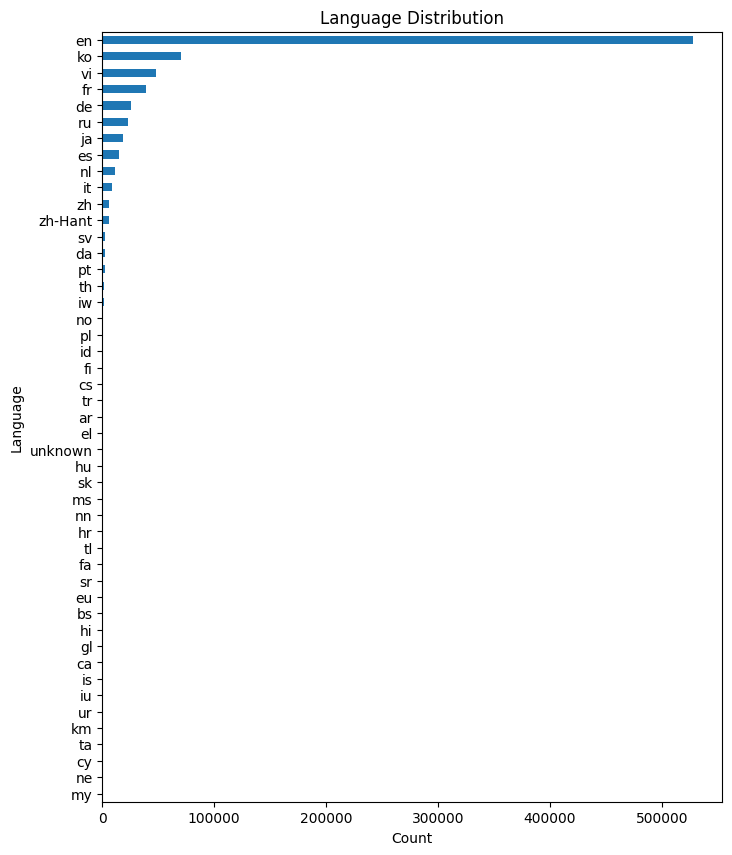

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))

df["language"].value_counts(ascending=True).plot(kind="barh")  # Use barh for horizontal bar plot
plt.xlabel("Count")
plt.ylabel("Language")
plt.title("Language Distribution")
plt.show()

In [3]:
df[df["language"] == "vi"].sample(20)

score                                              title  \
225017    5.0                     Lời cảm ơn FLC Flamingo Cát Bà   
364560    1.0                                             Quá tệ   
793798    5.0                                              Tuyệt   
27869     5.0                                          Tuyệt vời   
120123    5.0                         Ấn tượng bể bơi trên không   
215149    3.0             NHIỆT TÌNH NHƯNG CHƯA ĐỦ CHUYÊN NGHIỆP   
459171    5.0                   Kì nghỉ thoải mái cùng gia đình.   
326498    4.0                                            Rất tốt   
798475    5.0                                      Khách sạn tốt   
778618    5.0                                Khách sạn thoải mái   
426322    5.0                                                  .   
705333    5.0                       Hotel ngay ngã 6 Phù Đổng   
426361    5.0                                chuyến đi tuyệt vời   
808573    5.0                     NALOD - MỘT ĐIỂM ĐẾN TUYỆT VỜI   
754952    5.0                                          Very good   
680467    5.0                                   Nhà hàng Mermaid   
144940    5.0                                    Evian spa Lotte   
408057    1.0  Phải nói là quá tệ. Không bao giờ quay lại. Kh...   
479803    5.0           Một cuối tuần thư giãn và nhiều niềm vui   
764296    5.0              Một trải nghiệm đẳng cấp và khác biệt   

                                                   review language  
225017  Sub Cám ơn Mr Thành Con trai tôi làm rơi chiếc...       vi  
364560  Gia đình chúng tôi đến Đà Lạt nghỉ vài ngày cu...       vi  
793798  Tôi thấyk khách sạn okie, nhân viên thân thiện...       vi  
27869   Khách sạn ở giữa trung tâm,gần hồ,gần chợ Đồng...       vi  
120123  Ngoài thiết kế khách sạn trên cao hoành tráng ...       vi  
215149  Mình đặt phòng 301 ở tầng cao nhất. Phòng 2 gi...       vi  
459171  Không gian khách sạn khá rộng rãi, khu vực che...       vi  
326498  Mình ở đây lần đầu tiên, cảm thấy khá ổn, nhân...       vi  
798475  Khách sạn tốt, rộng rãi. Nhân viên ở khách sạn...       vi  
778618  Chất lượng phục vụ tốt. Phòng sạch sẽ, thoáng ...       vi  
426322  Các anh chị nhân viên ở đây rất vui vẻ và thân...       vi  
705333  Hotel Hảo Tin bây giờ là Hotel Hải Yến, n...       vi  
426361  Vị trí theo đánh giá riêng thì mình rất thích,...       vi  
808573  Nalod Đà Nẵng là điểm dừng chân của chúng tôi ...       vi  
754952  Nhân viên phục vụ tốt, chu đáo nhiệt tình, phò...       vi  
680467  Hôm nay tôi ăn tối tại nhà hàng Mermaid khách ...       vi  
144940  Tôi và vợ đã sử dụng dịch vụ trọn gói dành cho...       vi  
408057  - Phòng bình thường, khá cũ kỹ - Thường xuyên ...       vi  
479803  Khách sạn đẹp, view đẹp, đồ ăn ngon.  Nhân viê...       vi  
764296  Lần đầu lưu trú tại Chicland hotel, thật sự ấn...       vi

<Axes: >

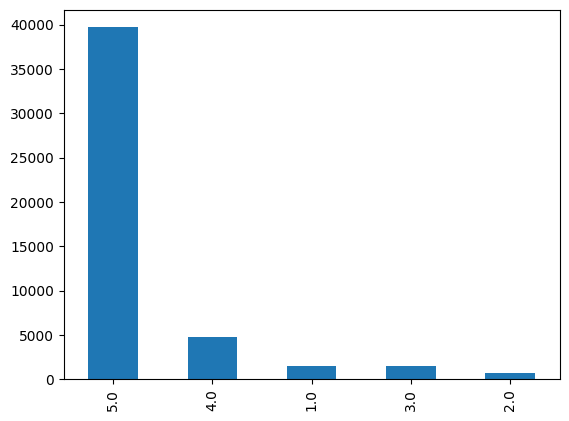

In [12]:
vi_df = df[df["language"] == "vi"].copy().reset_index(drop=True)

vi_df["score"].value_counts().plot(kind="bar")

In [13]:
vi_df[vi_df["score"] == 2.0].sample(20)

score                                              title  \
26274    2.0                               Không chấp nhận được   
47778    2.0                                  không giữ chữ tín   
4598     2.0            Chất lượng nghỉ dưỡng tệ ngoài mong đợi   
24162    2.0                                     Không quay lại   
9059     2.0                                  Phục vụ không tốt   
10538    2.0                             Cơ sở vật chất quá tồi   
36717    2.0                                     KHÔNG HÀI LÒNG   
37723    2.0                                    Khách sạn 2 sao   
28858    2.0                                                TẠM   
38986    2.0  Xấu hổ với bạn vì đặt phòng cho bạn ở Le Meridien   
43283    2.0                                Khách sạn cực kì tệ   
41459    2.0            Phòng khách sạn quá nhỏ với chuẩn 3 sao   
43969    2.0     Cơ sở vật chất nhưng thái độ nhân viên quá kém   
38090    2.0                             Chất lượng dịch vụ kém   
13198    2.0  Thiếu chuyên nghiệp - View không đẹp - thức ăn...   
21757    2.0                                      Khách sạn đẹp   
4718     2.0                                        Thất vọng   
5322     2.0                    Không xứng đáng với đẳng cấp 4*   
15523    2.0                         Trải nghiệm không trọn vẹn   
21320    2.0                                    khách sạn 5 sao   

                                                  review language  
26274  Khách sạn 3 sao nhưng phục vụ cực kỳ kém. Khác...       vi  
47778  mình có đến ks này vào tối thứ 7(24.02.18). mì...       vi  
4598   Điện chập chờn Liên lạc đến quầy tiếp tân thườ...       vi  
24162  Resort đẹp,dịch vụ ăn uống đa dạng, hồ bơi đẹp...       vi  
9059   Tôi và nhóm bạn book phòng từ cuối tháng 2/201...       vi  
10538  Phòng được thiết kế quá ư thiếu chuyên nghiệp,...       vi  
36717  Mình và cơ quan vừa có ngày nghỉ tại resort và...       vi  
37723  Khách sạn nằm trong hẻm, đây không phải là khá...       vi  
28858  Đây là lần thứ 2 tôi ở đây, lần đầu tháng 2 nă...       vi  
38986  Tôi đặt phòng tại Le Meridien saigon cho 2 vợ ...       vi  
43283  - Khách sạn theo quảng cáo là 3 sao,nhưng khi ...       vi  
41459  Khách sạn chỉ xứng đáng 2 sao , phòng rất nhỏ ...       vi  
43969  Điểm tốt: Phòng mới, sạch sẽ, yên tĩnh, thường...       vi  
38090  Khách sạn nằm khu vực trung tâm nên tiện đi lạ...       vi  
13198  Trước khi đến Khách sạn Bavico tôi hơi e dè vì...       vi  
21757  Khách sạn nơi đây rất đẹp nhưng tôi không thíc...       vi  
4718   Chúng tôi cùng lớp của con đi lien hoan cu...       vi  
5322   1 đêm ngủ lại cùng gia đình, tôi cảm thấy rất ...       vi  
15523  Resort đẹp, nhiều dịch vụ, tuy nhiên nhân viên...       vi  
21320  Không bao giờ quay lại ks này, tiêu chuẩn 5 sa...       vi

In [83]:
# !pip install wordcloud
# !pip install seaborn

To make your changes take effect please reactivate your environment
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


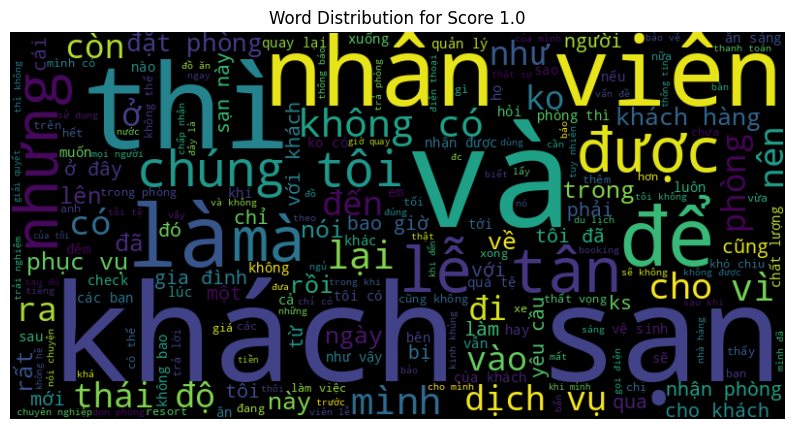

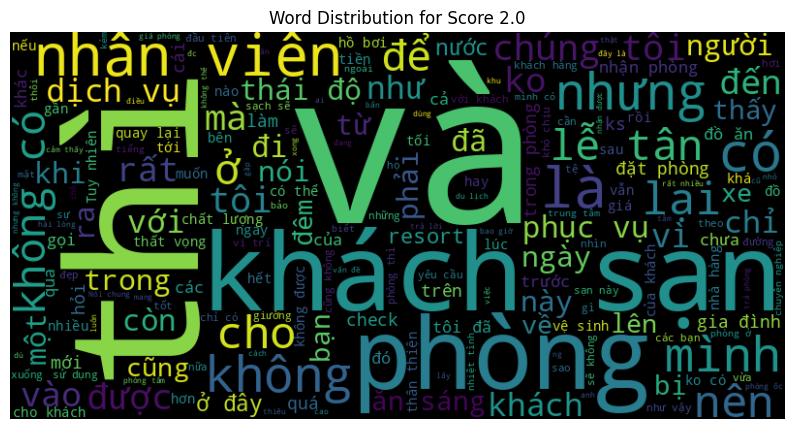

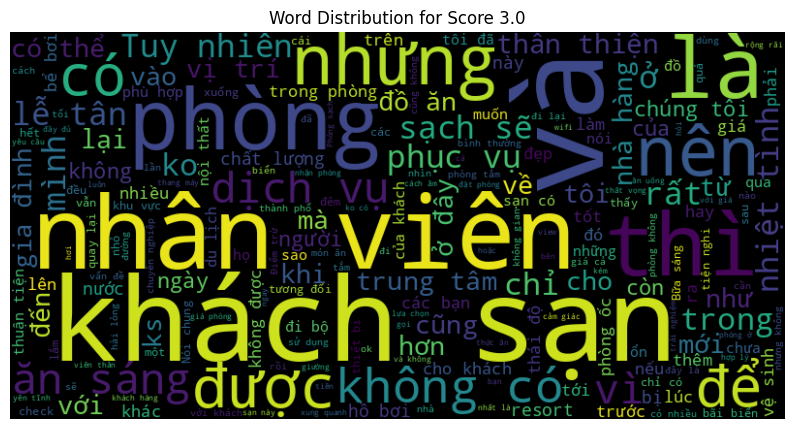

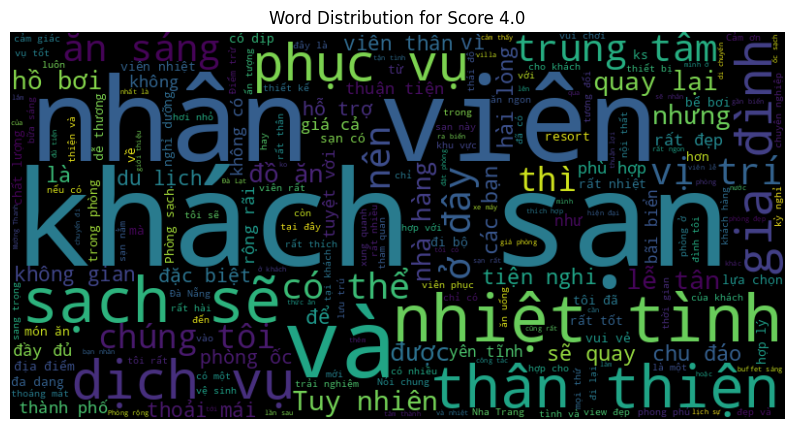

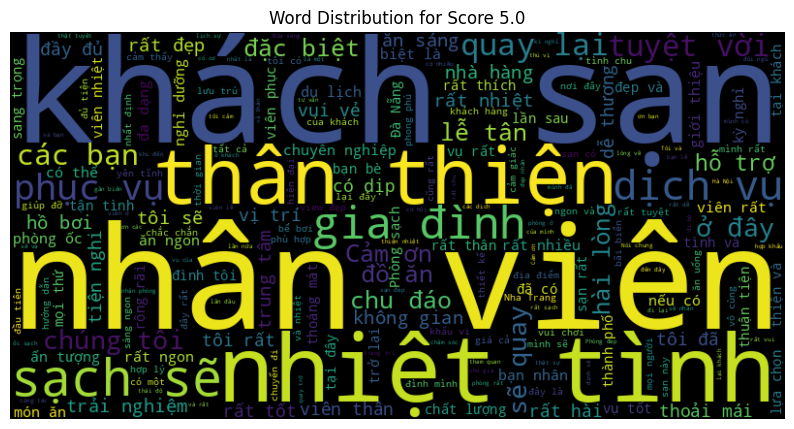

In [14]:
from wordcloud import WordCloud
from collections import Counter

# Group the dataframe by score
grouped_df = vi_df.groupby('score')

score_dict = {}

# Plot word distribution for each score
for score, group in grouped_df:
    # Concatenate all reviews for the score
    text = ' '.join(group['review'])
    
    score_dict[score] = Counter(' '.join(group['review']).split())
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Distribution for Score {score}')
    plt.axis('off')
    plt.show()


In [6]:
with open("../data/external/stopwords.txt") as f:
    stopwords = f.readlines()
    stopwords = [word.strip() for word in stopwords]
stopwords

['a lô',
 'a ha',
 'ai',
 'ai ai',
 'ai nấy',
 'ai đó',
 'alô',
 'amen',
 'anh',
 'anh ấy',
 'ba',
 'ba ba',
 'ba bản',
 'ba cùng',
 'ba họ',
 'ba ngày',
 'ba ngôi',
 'ba tăng',
 'bao giờ',
 'bao lâu',
 'bao nhiêu',
 'bao nả',
 'bay biến',
 'biết',
 'biết bao',
 'biết bao nhiêu',
 'biết chắc',
 'biết chừng nào',
 'biết mình',
 'biết mấy',
 'biết thế',
 'biết trước',
 'biết việc',
 'biết đâu',
 'biết đâu chừng',
 'biết đâu đấy',
 'biết được',
 'buổi',
 'buổi làm',
 'buổi mới',
 'buổi ngày',
 'buổi sớm',
 'bà',
 'bà ấy',
 'bài',
 'bài bác',
 'bài bỏ',
 'bài cái',
 'bác',
 'bán',
 'bán cấp',
 'bán dạ',
 'bán thế',
 'bây bẩy',
 'bây chừ',
 'bây giờ',
 'bây nhiêu',
 'bèn',
 'béng',
 'bên',
 'bên bị',
 'bên có',
 'bên cạnh',
 'bông',
 'bước',
 'bước khỏi',
 'bước tới',
 'bước đi',
 'bạn',
 'bản',
 'bản bộ',
 'bản riêng',
 'bản thân',
 'bản ý',
 'bất chợt',
 'bất cứ',
 'bất giác',
 'bất kì',
 'bất kể',
 'bất kỳ',
 'bất luận',
 'bất ngờ',
 'bất nhược',
 'bất quá',
 'bất quá chỉ',
 'bất thình l

In [7]:
# reference: https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert/notebook#3.-score-and-N-grams
from collections import defaultdict
import seaborn as sns 
import random

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' and token not in stopwords]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

def create_df(n_gram):
    
    list_df = []
    
    unique_scores = vi_df['score'].unique().tolist()
    unique_scores.sort()
    for score in unique_scores:
        ngrams = defaultdict(int)

        for tweet in vi_df[vi_df['score'] == score]['title']:
            for word in generate_ngrams(tweet, n_gram):
                ngrams[word] += 1
                
        df_ngrams = pd.DataFrame(sorted(ngrams.items(), key=lambda x: x[1])[::-1])
        list_df.append(df_ngrams)

    return list_df
    
# Unigrams

unigrams = create_df(1)

# Bigrams
        
bigrams = create_df(2)

# Trigrams
        
trigrams = create_df(3)
def draw_ngrams(typ, list_df, N):
    fig, axes = plt.subplots(ncols=len(list_df), figsize=(18, 50), dpi=100)
    plt.tight_layout()
    
    for i, _df in enumerate(list_df):
        sns.barplot(y=_df[0].values[:N], x=_df[1].values[:N], ax=axes[i], color=random.choice(sns.color_palette()))


    for i, _df in enumerate(list_df):
        axes[i].spines['right'].set_visible(False)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', labelsize=18)
        axes[i].tick_params(axis='y', labelsize=18)
        axes[i].set_title(f'Score = {i + 1} ', fontsize=15)

    # axes[0].set_title(f'Top {N} most common {typ} in Disaster Tweets', fontsize=15)
    # axes[1].set_title(f'Top {N} most common {typ} in Non-disaster Tweets', fontsize=15)

    plt.show()

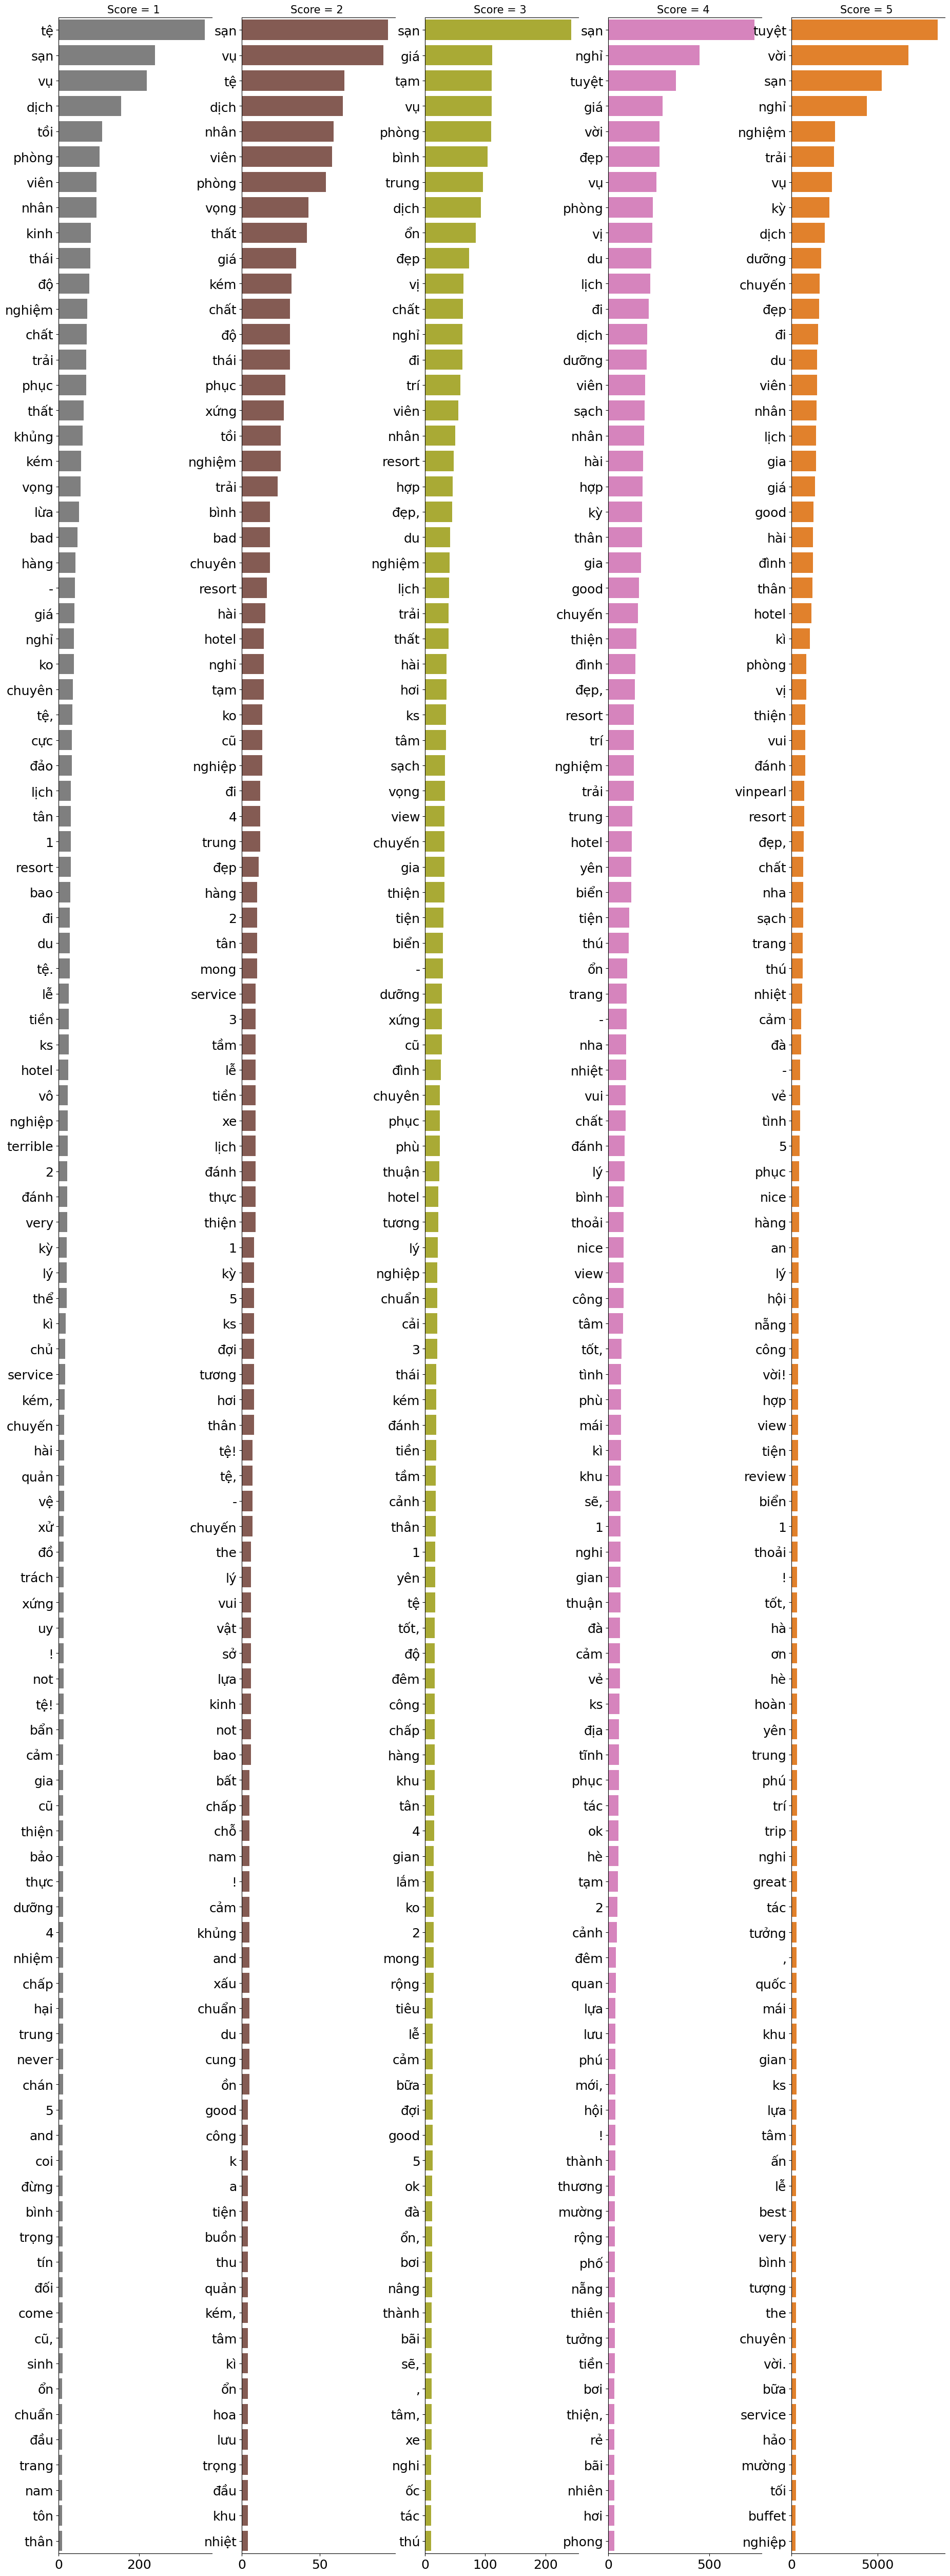

In [8]:
draw_ngrams("unigrams",unigrams, 100)

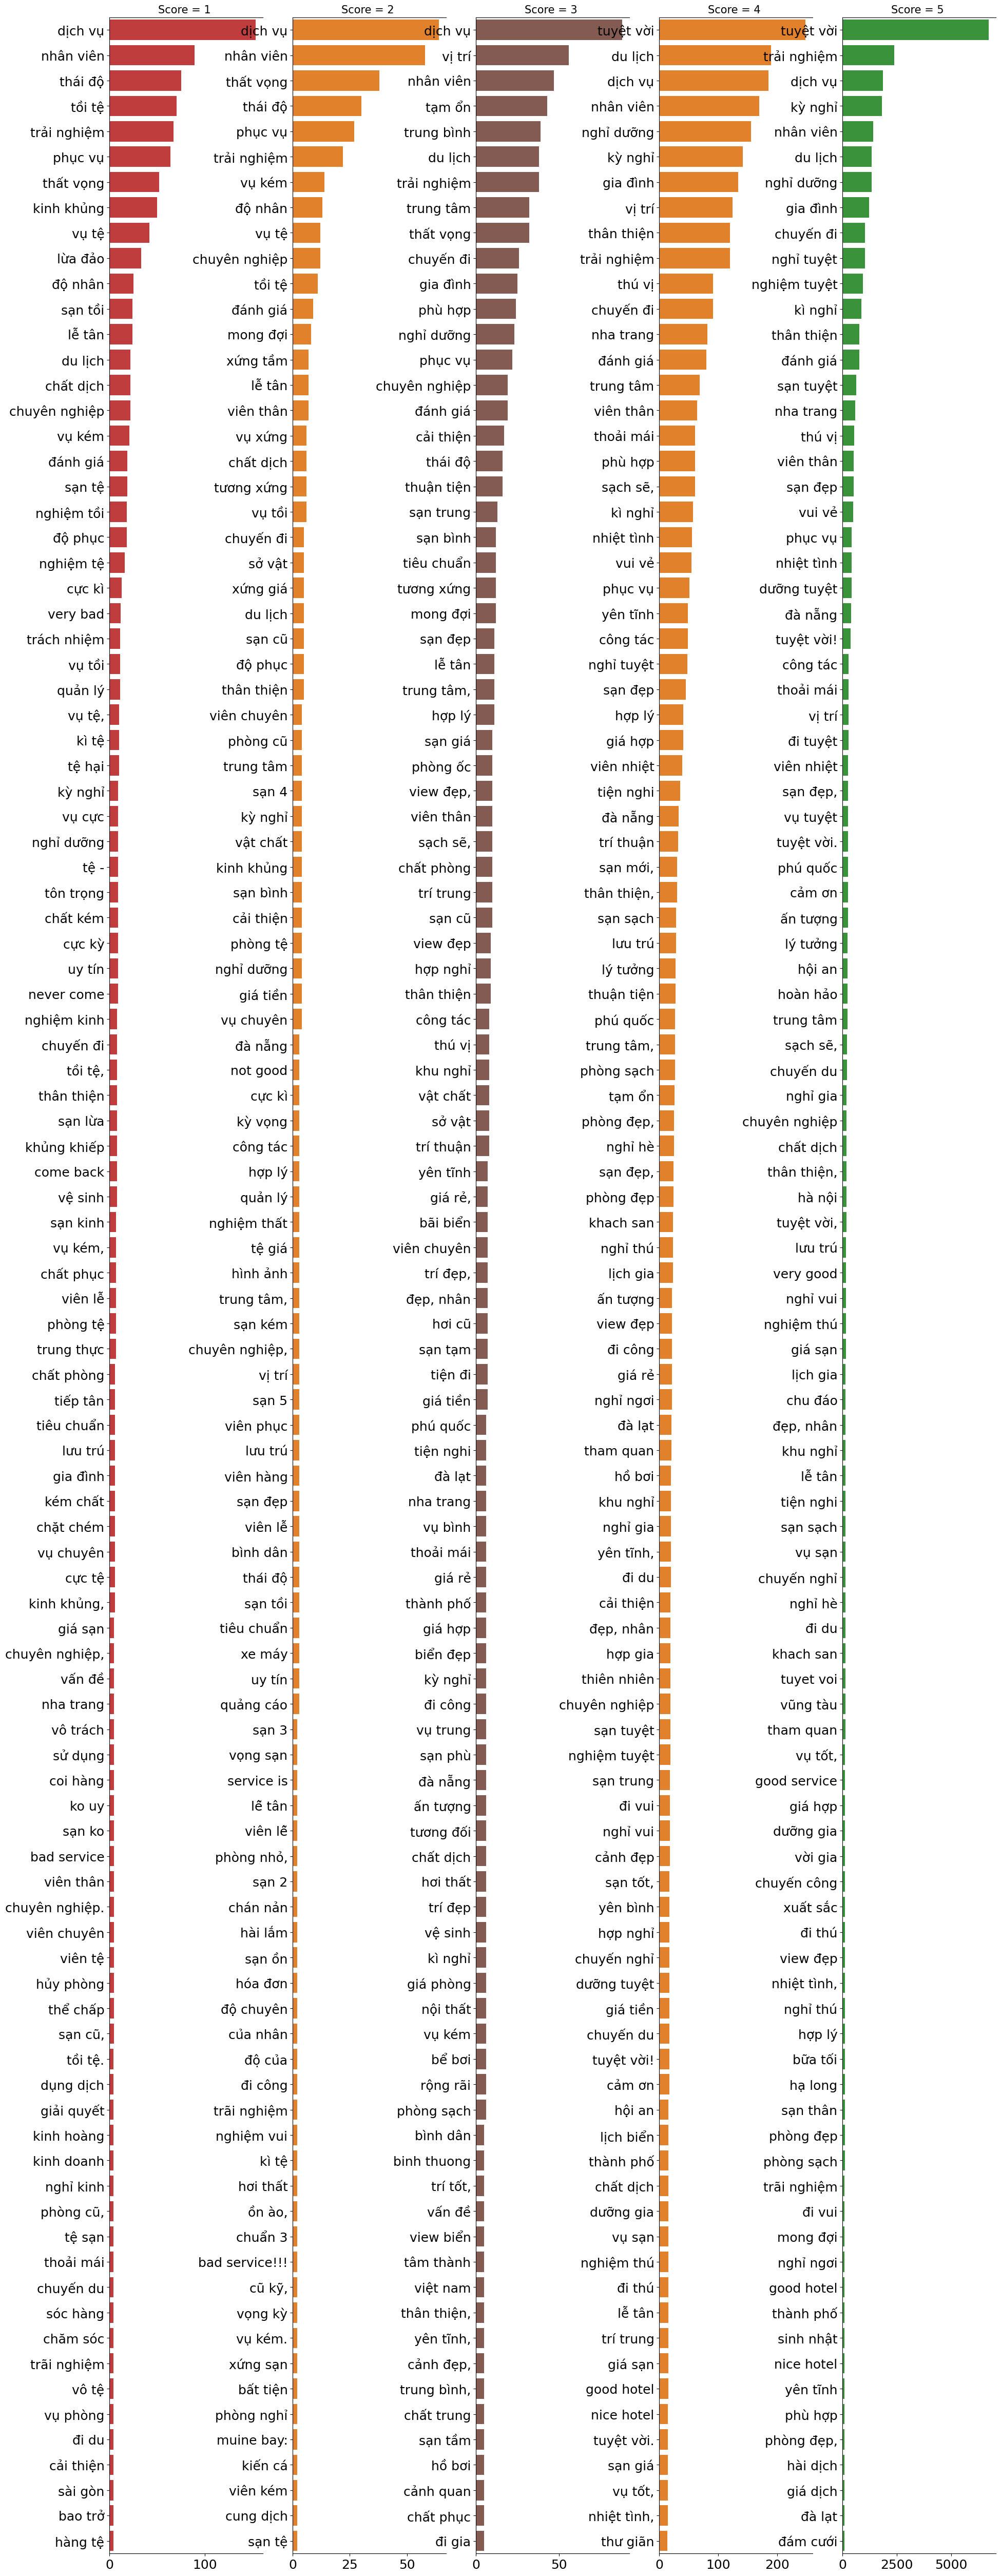

In [9]:
draw_ngrams("bigrams", bigrams, 100)

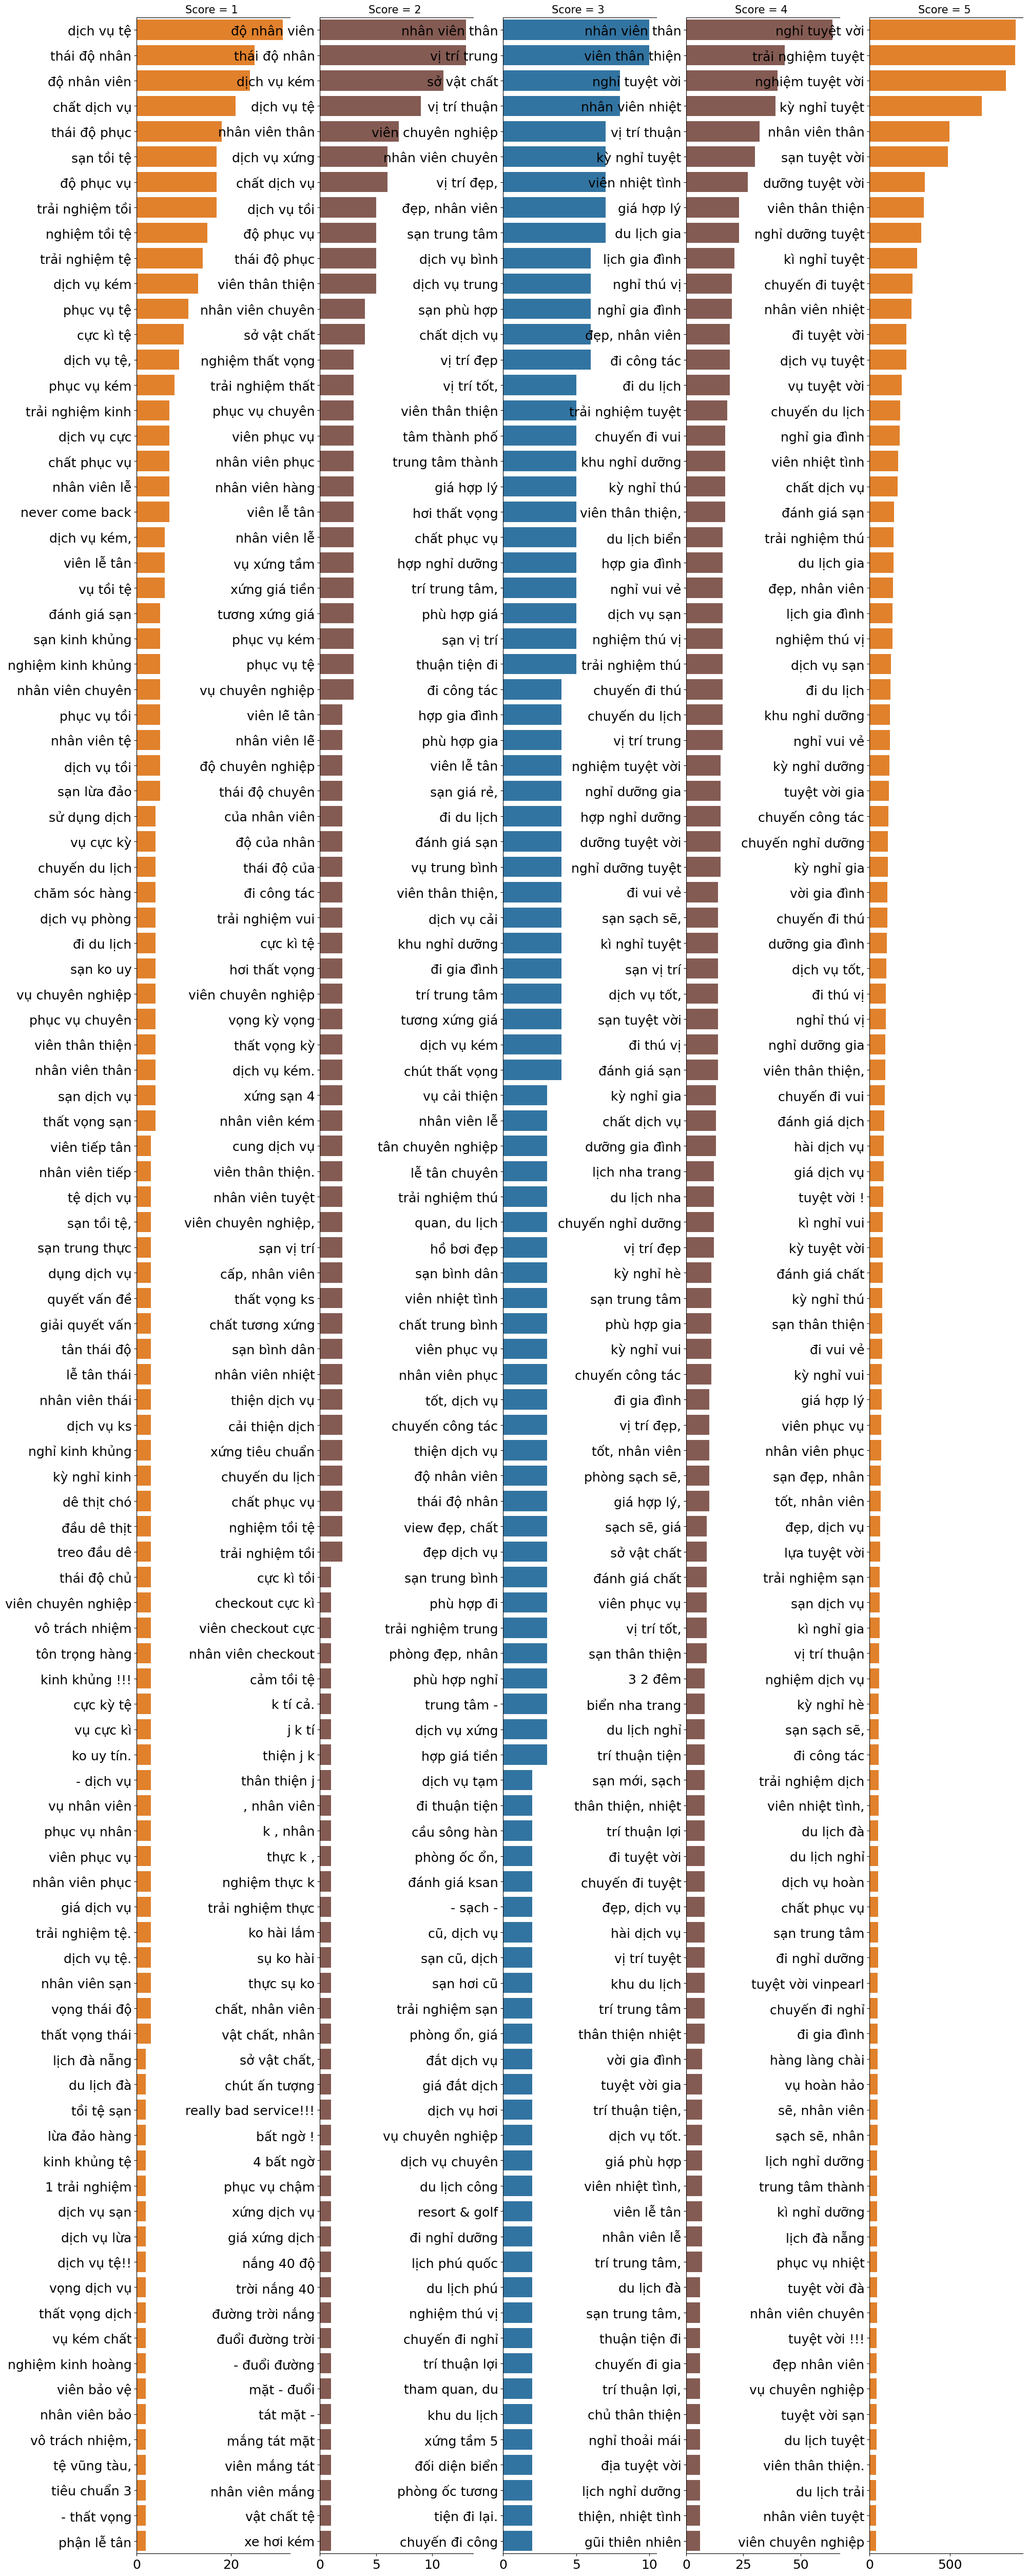

In [10]:
draw_ngrams("trigrams", trigrams, 100)

---

In [77]:
data2plot = {}
words = set()
for score, counter in score_dict.items():
    print(f"Score {score}:")
    print(counter.most_common(10))
    words.update([i[0] for i in counter.most_common(50)])
    
for score, counter in score_dict.items():
    data2plot[score] = [counter[word] for word in words]
    

Score 1.0:
[('không', 3393), ('phòng', 2904), ('có', 2821), ('khách', 2805), ('thì', 2394), ('và', 2262), ('tôi', 2023), ('là', 2021), ('mình', 1846), ('sạn', 1586)]
Score 2.0:
[('không', 1416), ('có', 1295), ('phòng', 1204), ('khách', 968), ('và', 958), ('thì', 853), ('là', 780), ('tôi', 722), ('mình', 643), ('ở', 617)]
Score 3.0:
[('có', 2561), ('không', 2300), ('và', 1922), ('phòng', 1831), ('khách', 1697), ('là', 1370), ('sạn', 1334), ('ở', 1189), ('thì', 1116), ('nhưng', 1094)]
Score 4.0:
[('và', 6306), ('có', 6170), ('rất', 5258), ('khách', 4178), ('sạn', 4076), ('phòng', 3869), ('viên', 3493), ('ở', 3323), ('là', 3076), ('không', 2836)]
Score 5.0:
[('rất', 62048), ('và', 59075), ('có', 35304), ('viên', 33118), ('sạn', 29671), ('khách', 29131), ('tôi', 27128), ('ở', 24798), ('bạn', 24793), ('vụ', 22373)]


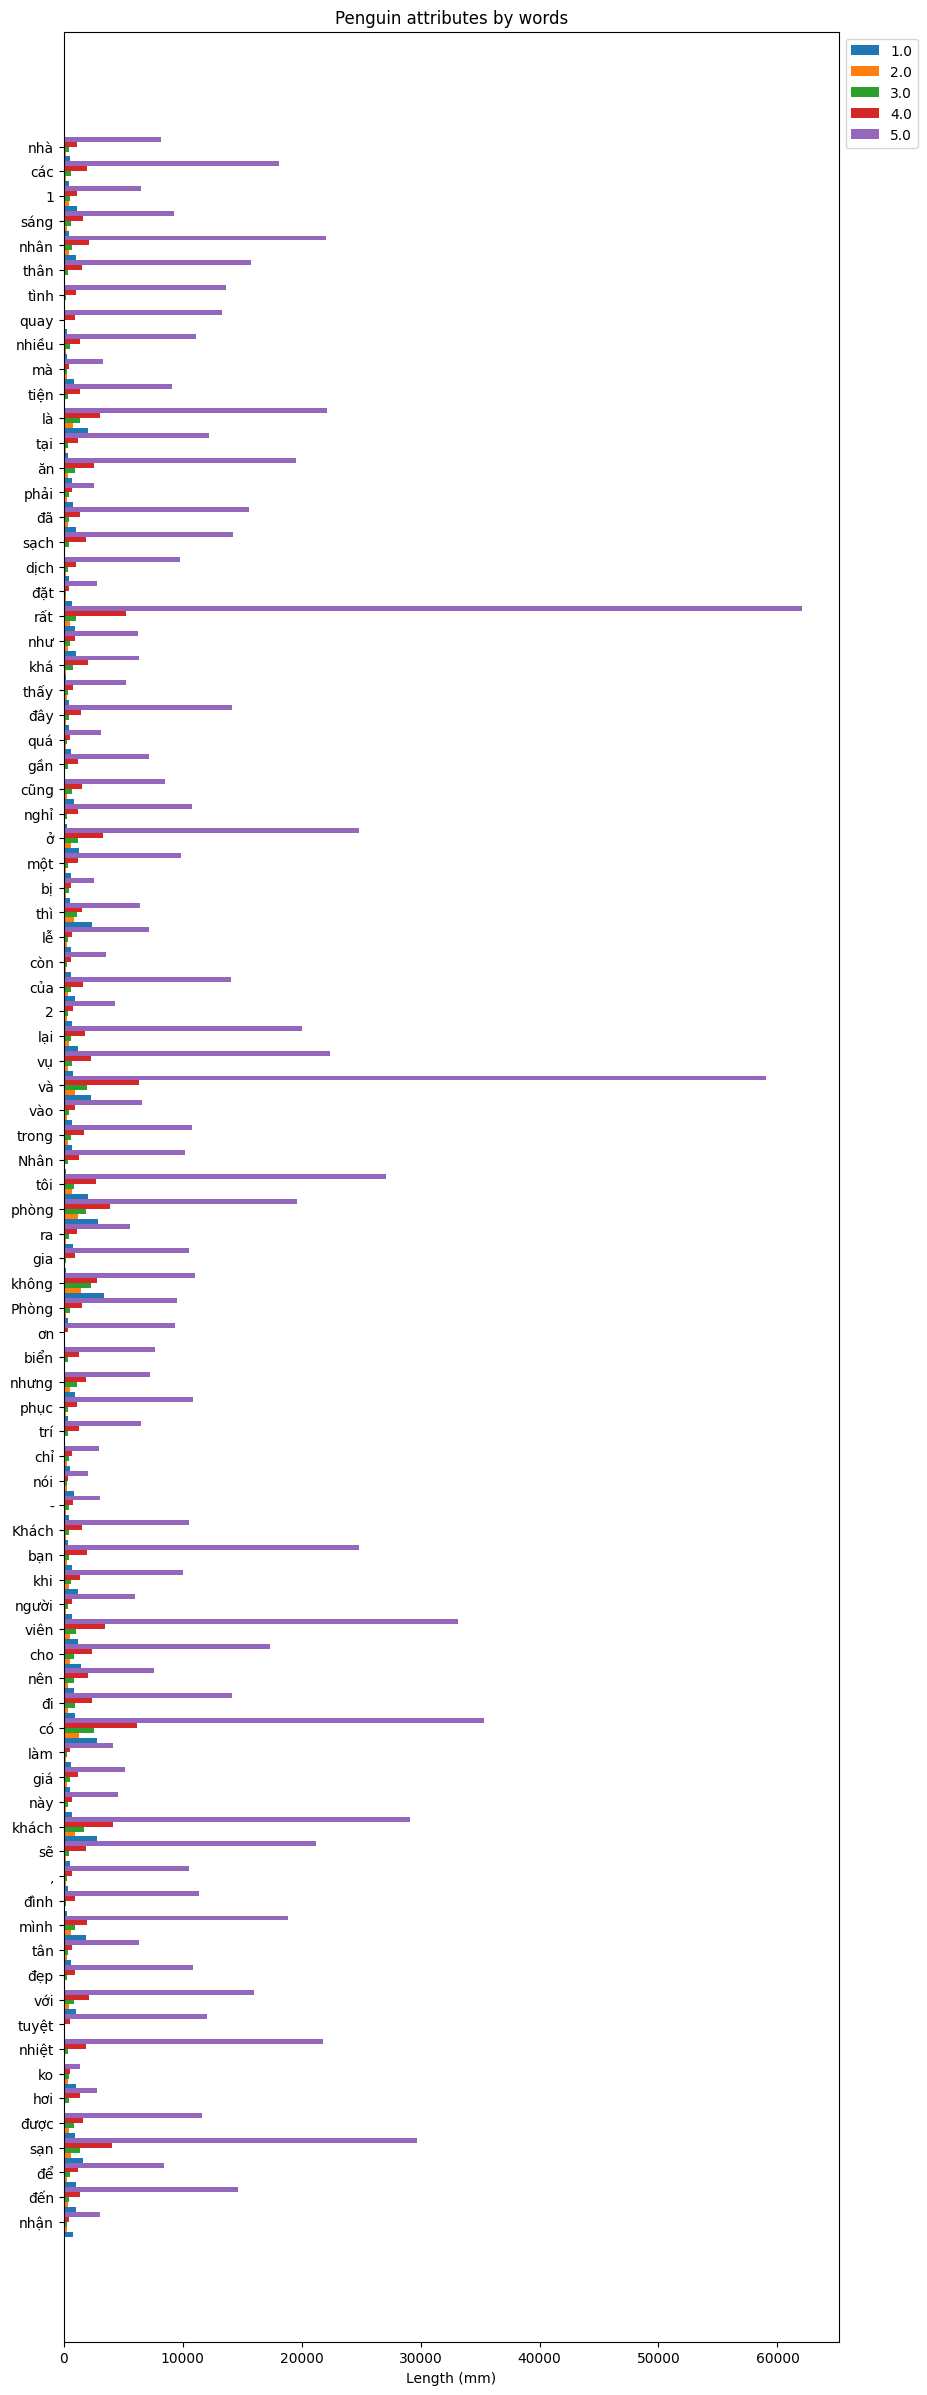

In [80]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(words))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 30))

attributes = list(data2plot.keys())
measurements = list(data2plot.values())

for i, measurement in enumerate(measurements):
    offset = width * (i - len(attributes) / 2)
    rects = ax.barh(x + offset, measurement, width, label=attributes[i])  # Switched x and y axis
    # ax.bar_label(rects, padding=3)

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_xlabel('Length (mm)')  # Switched x and y axis labels
ax.set_title('Penguin attributes by words')
ax.set_yticks(x)  # Switched x and y axis ticks
ax.set_yticklabels(words)  # Switched x and y axis tick labels
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()